In [143]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [28]:
%load_ext autoreload
%autoreload 2 

import os
import sys

curr_dir = os.getcwd()
print('current direcotry is ', curr_dir)
if curr_dir not in sys.path:
    sys.path.append(curr_dir)
src_dir = os.path.join(curr_dir, 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)
print(sys.path)

#
pdb_dir = '/home/yuan/data/pdb/rsync'
data_dir = './data/'
outputs_dir = '/home/yuan/output/pdb_abag'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
current direcotry is  /home/yuan/bio/protein_design/docking_antigen-antibody/antibody_antigen_complex
['/home/yuan/anaconda3/envs/openfold-env/lib/python310.zip', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/lib-dynload', '', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/site-packages', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/site-packages/openfold-2.2.0-py3.10-linux-x86_64.egg', '/home/yuan/bio/protein_design/docking_antigen-antibody/antibody_antigen_complex', '/home/yuan/bio/protein_design/docking_antigen-antibody/antibody_antigen_complex/src']


## confirm parameter
    - max_span
    - min_fragment

In [38]:
from itertools import chain

from src.analyze_complex import AnalyzeComplex
from src.dir import Dir

sasa, n = [], 0
file_iter = Dir(outputs_dir).recrusive_files()
for path in file_iter:
    if path.endswith('freesasa.p'):
        sasa.append(path)
        n += 1
print(f"number of proteins: {n}")

number of proteins: 6133


### max_span

In [102]:
def search_spans(pool):
    spans1, spans2 = [], []
    for pfile in pool:
        p3 = AnalyzeComplex(pfile, verbose=False)
        _ds1, _ds2 = p3.get_spans()
        spans1.extend(_ds1)
        spans2.extend(_ds2)
    spans1 = list(chain.from_iterable(spans1))
    spans2 = list(chain.from_iterable(spans2))
    return spans1, spans2
# 
spans1, spans2 = search_spans(sasa)

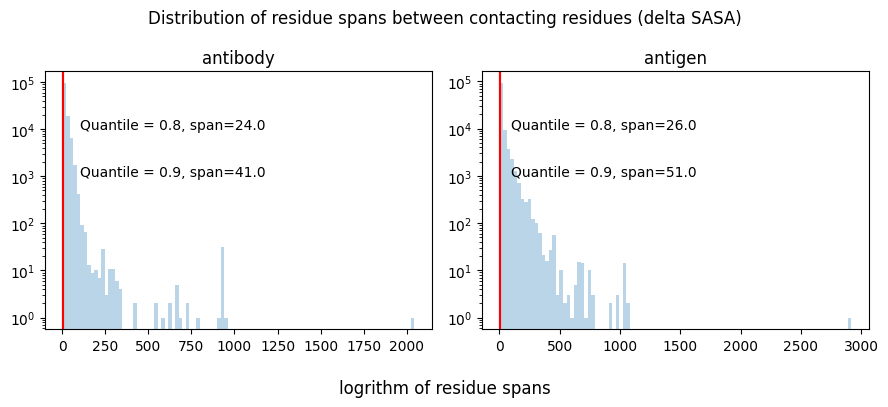

In [116]:
fig, ax = plt.subplots(1,2, figsize=(9,4), layout='tight')
fig.suptitle('Distribution of residue spans between contacting residues (delta SASA)')
fig.supxlabel('logrithm of residue spans')

i=0
ax[i].hist(spans1, log=True, bins=100, alpha=.3)
ax[i].set_title('antibody')
q = 0.90
q_1 = np.quantile(spans1, q)
ax[i].axvline(np.log(q_1), color='red')
ax[i].text(100, 1_000, f"Quantile = {q}, span={q_1}")
ql = 0.8
q_1 = np.quantile(spans1, ql)
ax[i].axvline(np.log(q_1), color='red')
ax[i].text(100, 10_000, f"Quantile = {ql}, span={q_1}")

i=1
ax[i].hist(spans2, log=True, bins=100, alpha=.3)
ax[i].set_title('antigen')
q_2 = np.quantile(spans2, q)
ax[i].axvline(np.log(q_2), color='red')
ax[i].text(100, 1_000, f"Quantile = {q}, span={q_2}")
q_2 = np.quantile(spans2, ql)
ax[i].axvline(np.log(q_2), color='red')
ax[i].text(100, 10_000, f"Quantile = {ql}, span={q_2}")

plt.show()

### min_fragment

In [117]:
def search_fragments(pool):
    frag1, frag2 = [], []
    for pfile in pool:
        p3 = AnalyzeComplex(pfile, verbose=False)
        _ds1, _ds2 = p3.get_fragments()
        frag1.extend(_ds1)
        frag2.extend(_ds2)
    frag1 = list(chain.from_iterable(frag1))
    frag2 = list(chain.from_iterable(frag2))
    return frag1, frag2
# 
frag1, frag2 = search_fragments(sasa)

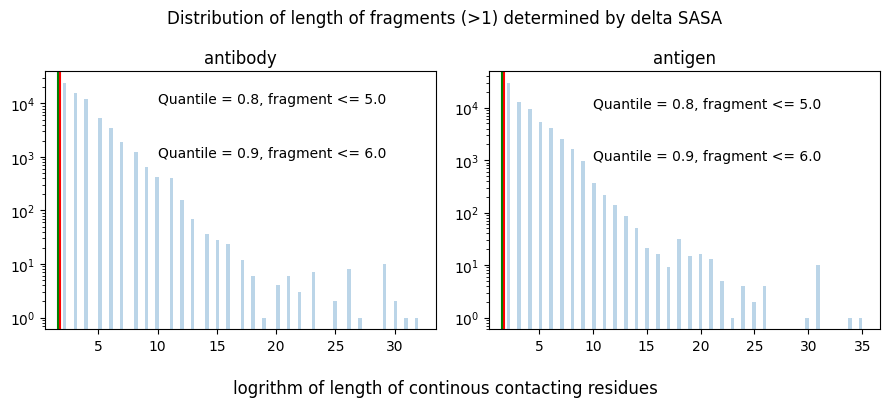

In [121]:
fig, ax = plt.subplots(1,2, figsize=(9,4), layout='tight')
fig.suptitle('Distribution of length of fragments (>1) determined by delta SASA')
fig.supxlabel('logrithm of length of continous contacting residues')

i=0
ax[i].hist(frag1, log=True, bins=100, alpha=.3)
ax[i].set_title('antibody')
q = 0.90
q_1 = np.quantile(frag1, q)
ax[i].axvline(np.log(q_1), color='red')
ax[i].text(10, 1_000, f"Quantile = {q}, fragment <= {q_1}")
ql = 0.8
q_1 = np.quantile(frag1, ql)
ax[i].axvline(np.log(q_1), color='green')
ax[i].text(10, 10_000, f"Quantile = {ql}, fragment <= {q_1}")

i=1
ax[i].hist(frag2, log=True, bins=100, alpha=.3)
ax[i].set_title('antigen')
q_2 = np.quantile(frag2, q)
ax[i].axvline(np.log(q_2), color='red')
ax[i].text(10, 1_000, f"Quantile = {q}, fragment <= {q_2}")
q_2 = np.quantile(frag2, ql)
ax[i].axvline(np.log(q_2), color='green')
ax[i].text(10, 10_000, f"Quantile = {ql}, fragment <= {q_2}")

plt.show()

### existence of certain continuous fragment

In [122]:
def search_fragments(pool):
    frag1, frag2 = [], []
    for pfile in pool:
        p3 = AnalyzeComplex(pfile, verbose=False)
        _ds1, _ds2 = p3.get_fragments()
        frag1.extend(_ds1)
        frag2.extend(_ds2)
    return frag1, frag2
# 
frag1, frag2 = search_fragments(sasa)

In [193]:
def freq_fragment(frags):
    scope = [(2,3), (3,4), (4,5), (5,6), (6,7), (8,10), (11, 20), (21, 30), (30,None)]
    res = {}
    for a, b in scope:
        if b is None:
            key = f">={a}"
            res[key] = 0
            for frag in frags:
                target = [i for i in frag if i>=a]
                if target:
                    res[key] += 1
        elif b - a == 1:
            key = str(a)
            res[key] = 0
            for frag in frags:
                target = [i for i in frag if i==a]
                if target:
                    res[key] += 1
        else:
            key = f"{a}-{b}"
            res[key] = 0
            for frag in frags:
                target = [i for i in frag if a<=i<b]
                if target:
                    res[key] += 1
    return res
count1 = freq_fragment(frag1)
count1 = pd.DataFrame({'label':count1.keys(), 'value':count1.values()})
count1['ratio'] = count1['value']/len(frag1)
count1['group'] = 'antibody'
count2 = freq_fragment(frag2)
count2 = pd.DataFrame({'label':count2.keys(), 'value':count2.values()})
count2['group'] = 'antigen'
count2['ratio'] = count2['value']/len(frag2)
df = pd.concat([count1, count2])
df

,label,value,ratio,group
0,2,14318,0.611045,antibody
1,3,11550,0.492916,antibody
2,4,9881,0.421688,antibody
3,5,4832,0.206214,antibody
4,6,3273,0.139681,antibody
5,8-10,1811,0.077287,antibody
6,11-20,715,0.030514,antibody
7,21-30,27,0.001152,antibody
8,>=30,4,0.000171,antibody
0,2,14978,0.639211,antigen


Text(0.5, 0.98, 'Existence of various fragments in antibody-antigen complex 23432')

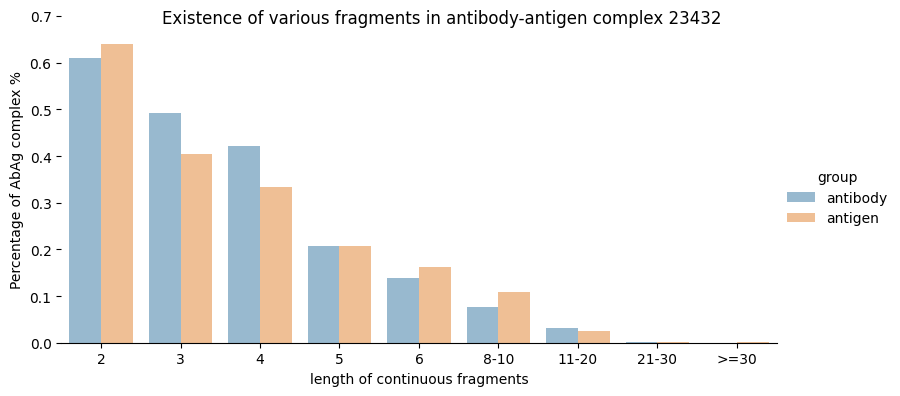

In [222]:
g = sns.catplot(data=df, kind='bar', x="label", y="ratio", hue='group', \
    errorbar=None, alpha=.5, height=4, aspect=2,)
g.despine(left=True)
g.set(yticks=np.arange(0,.8,.1))
g.set_axis_labels("length of continuous fragments", "Percentage of AbAg complex %")
g.fig.suptitle(f"Existence of various fragments in antibody-antigen complex {len(frag1)}")
# g.fig.set_size_inches(8,4)

## collect sequence text

In [226]:
from src.dir import Dir

pool, n = [], 0
file_iter = Dir(outputs_dir).recrusive_files()
for path in file_iter:
    if path.endswith('seq_sasa.p'):
        pool.append(path)
        n += 1
print(f"number of proteins: {n}")

number of proteins: 6133


In [234]:
from src.analyze_complex import AnalyzeComplex

def create_ds(pool, min_fragment):
    ds_data = []
    for pfile in pool:
        p2 = AnalyzeComplex(pfile, verbose=False)
        _ds = p2.build_dataset(min_fragment)
        ds_data.extend(_ds)
    ds_data = pd.DataFrame(ds_data)
    outfile = os.path.join(data_dir, f'abag_complex_{min_fragment}.csv')
    ds_data.to_csv(outfile)
    print(min_fragment, ds_data.shape[0], outfile)
    return outfile
#
for min_fragment in range(0, 6):
    create_ds(pool, min_fragment=min_fragment)

0 23257 ./data/abag_complex_0.csv
1 23183 ./data/abag_complex_1.csv
2 23133 ./data/abag_complex_2.csv
3 22912 ./data/abag_complex_3.csv
4 22056 ./data/abag_complex_4.csv
5 20788 ./data/abag_complex_5.csv


In [230]:
ds = pd.read_csv('./data/abag_complex_1.csv')
ds

,Unnamed: 0,output,output_label,input,input_label
0,0,VQLLQSAGGLVQPGGSLRLSCAASGLTVSANYMSWVRQAPGKGLEW...,antibody,RGDEVRQIAPGQTGKIADY | YRLFRKSNLKPFERDISTEIYQAG...,receptor
1,1,Y | RGDEIYYESSGYYSY,heavy,N | CTFEYVSQPFLMDFKNLREFVFKNIDGYFKIYSKHTPILVRE...,receptor
2,2,YSGSTYYNPSLKSRVT | YYESSGY,heavy,NITNLCPFDEVFNATRFASVYAWNRKRISN | N | APAT | PF...,receptor
3,3,ADDVHWYQQLPRTAPKLLIYGNNNR,light,ATN | QPFLMDFKNLREFVFKNIDGYFKIYSKH,receptor
4,4,YDSSLS,light,KFLPFQQFGRDIADTTDAVRDPQTL,receptor
...,...,...,...,...,...
23178,23178,DIQMTQSPSSLSASVGDRVTITCRASQGINNY | SGSGTAFTLTI...,light,LIDELR | GRCQM | QTP | RDHSLERLTRLFPDATVPATVPA...,receptor
23179,23179,TFSSYAMSWVRQAPGKGLEWVSAISGSGGSS | SGSYYYHY,heavy,KLAAQGAEKTYGNGDSLNTGKLKNDKVSRFDFIRQIEVDGQLITLE...,receptor
23180,23180,SVSSSYLAWYQQKPGQAPRLLIYGTSNRATGIPDRFSGSGSGTDFT...,light,KLAAQGAEKTYGNGDSLNTGKLKNDKVSRFDFIRQIEVDGQLIT | GK,receptor
23181,23181,RFSYSWMNWVKQRPGKGLEWIGRIYPGDGDTKYSGKFKGKATLTAD...,heavy,QLPWTSCKNSWNTGNCTNYFSEDNITWTLHSTSPAEEFYTR,receptor
